In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 61614563.29it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


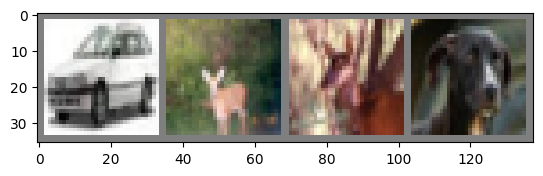

car   deer  deer  dog  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

##Q2

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3 * 32 * 32, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 2.152 | Accuracy: 32.200
Test Accuracy: 31.790
Epoch:  2
Train Loss: 2.104 | Accuracy: 34.482
Test Accuracy: 32.650
Epoch:  3
Train Loss: 2.082 | Accuracy: 35.040
Test Accuracy: 34.650
Epoch:  4
Train Loss: 2.069 | Accuracy: 35.504
Test Accuracy: 35.110
Epoch:  5
Train Loss: 2.061 | Accuracy: 35.982
Test Accuracy: 33.440
Epoch:  6
Train Loss: 2.052 | Accuracy: 36.036
Test Accuracy: 34.600
Epoch:  7
Train Loss: 2.046 | Accuracy: 36.102
Test Accuracy: 34.340
Epoch:  8
Train Loss: 2.040 | Accuracy: 36.526
Test Accuracy: 34.260
Epoch:  9
Train Loss: 2.034 | Accuracy: 36.776
Test Accuracy: 32.900
Epoch:  10
Train Loss: 2.031 | Accuracy: 36.682
Test Accuracy: 33.390
Epoch:  11
Train Loss: 2.029 | Accuracy: 37.240
Test Accuracy: 34.120
Epoch:  12
Train Loss: 2.027 | Accuracy: 37.036
Test Accuracy: 32.580
Epoch:  13
Train Loss: 2.017 | Accuracy: 37.158
Test Accuracy: 34.890
Epoch:  14
Train Loss: 2.014 | Accuracy: 37.366
Test Accuracy: 33.680
Epoch:  15
Train Loss: 2.010 

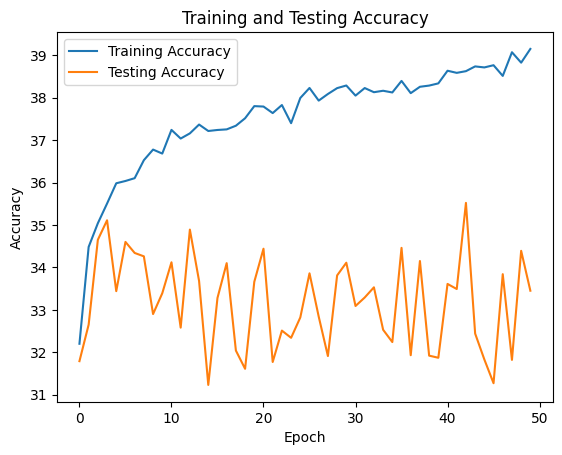

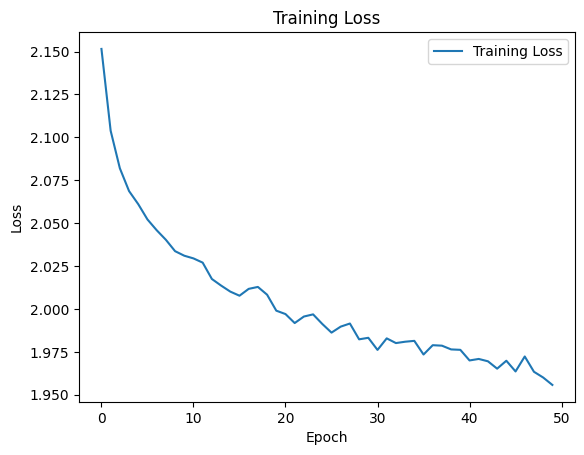

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

The total number of parameters is (3 * 32 * 32) * 10 + 10 = 30730, where last 10 is the numbers of bias and each output neuron has 1 bias.

## Q3

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.673 | Accuracy: 40.564
Test Accuracy: 45.420
Epoch:  2
Train Loss: 1.461 | Accuracy: 48.218
Test Accuracy: 50.090
Epoch:  3
Train Loss: 1.371 | Accuracy: 51.342
Test Accuracy: 49.480
Epoch:  4
Train Loss: 1.301 | Accuracy: 53.894
Test Accuracy: 50.840
Epoch:  5
Train Loss: 1.250 | Accuracy: 55.664
Test Accuracy: 50.870
Epoch:  6
Train Loss: 1.198 | Accuracy: 57.450
Test Accuracy: 51.580
Epoch:  7
Train Loss: 1.160 | Accuracy: 58.608
Test Accuracy: 51.450
Epoch:  8
Train Loss: 1.119 | Accuracy: 60.334
Test Accuracy: 52.500
Epoch:  9
Train Loss: 1.086 | Accuracy: 61.134
Test Accuracy: 51.890
Epoch:  10
Train Loss: 1.056 | Accuracy: 62.148
Test Accuracy: 50.900
Epoch:  11
Train Loss: 1.026 | Accuracy: 63.402
Test Accuracy: 52.490
Epoch:  12
Train Loss: 0.996 | Accuracy: 64.262
Test Accuracy: 51.870
Epoch:  13
Train Loss: 0.965 | Accuracy: 65.394
Test Accuracy: 50.300
Epoch:  14
Train Loss: 0.945 | Accuracy: 66.192
Test Accuracy: 50.990
Epoch:  15
Train Loss: 0.921 

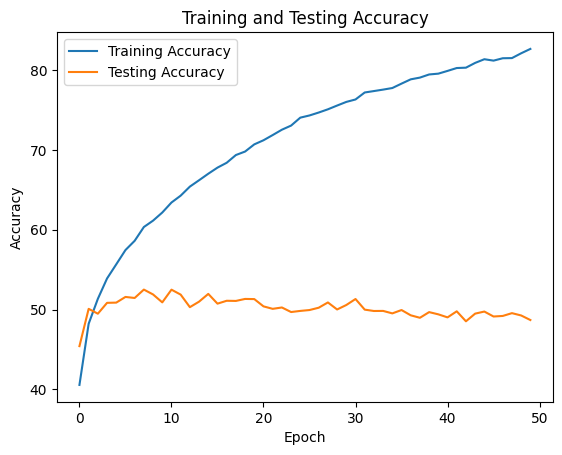

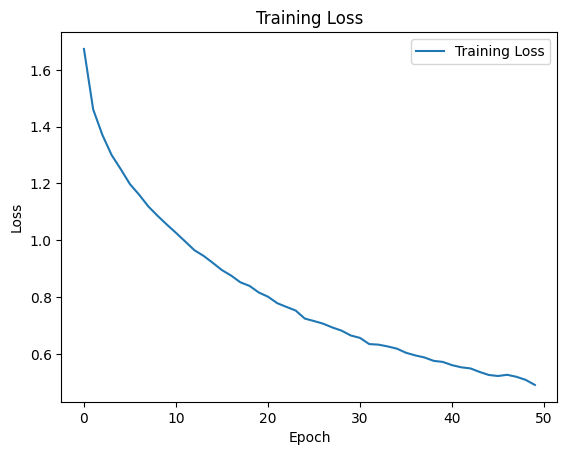

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

##Q3 - No Relu

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


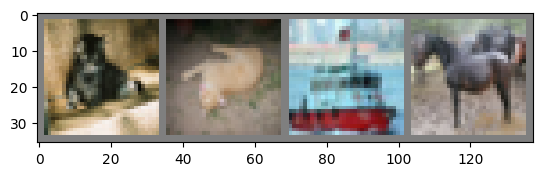

cat   cat   ship  horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(25):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.823 | Accuracy: 36.048
Test Accuracy: 37.490
Epoch:  2
Train Loss: 1.763 | Accuracy: 38.426
Test Accuracy: 37.580
Epoch:  3
Train Loss: 1.746 | Accuracy: 39.598
Test Accuracy: 37.450
Epoch:  4
Train Loss: 1.735 | Accuracy: 40.092
Test Accuracy: 38.090
Epoch:  5
Train Loss: 1.728 | Accuracy: 40.504
Test Accuracy: 38.060
Epoch:  6
Train Loss: 1.720 | Accuracy: 40.988
Test Accuracy: 39.730
Epoch:  7
Train Loss: 1.716 | Accuracy: 41.122
Test Accuracy: 38.480
Epoch:  8
Train Loss: 1.713 | Accuracy: 41.260
Test Accuracy: 39.300
Epoch:  9
Train Loss: 1.708 | Accuracy: 41.210
Test Accuracy: 38.940
Epoch:  10
Train Loss: 1.705 | Accuracy: 41.454
Test Accuracy: 37.420
Epoch:  11
Train Loss: 1.703 | Accuracy: 41.744
Test Accuracy: 38.580
Epoch:  12
Train Loss: 1.699 | Accuracy: 41.528
Test Accuracy: 39.340
Epoch:  13
Train Loss: 1.698 | Accuracy: 41.530
Test Accuracy: 38.210
Epoch:  14
Train Loss: 1.696 | Accuracy: 42.054
Test Accuracy: 38.200
Epoch:  15
Train Loss: 1.694 

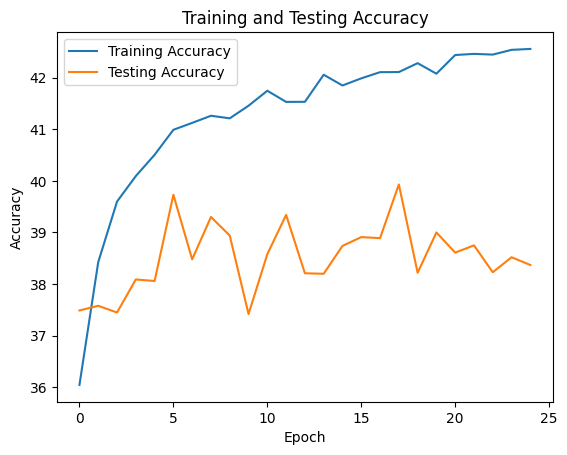

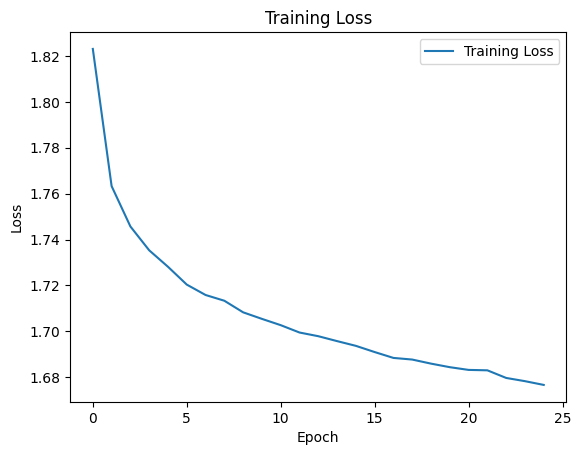

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

A neural network without an activation function is just a linear regression model. By having ReLu activation function, we introduce non linearity in the network, thereby enabling the model to learn more complex relationships between the inputs and the outputs and be more effective.

## Q4

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


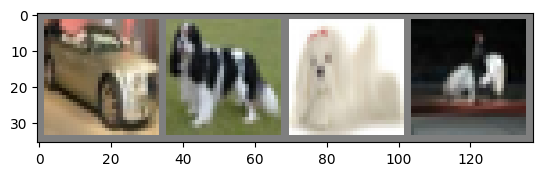

car   dog   dog   horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140) #(3*32*32)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(25):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.712 | Accuracy: 36.646
Test Accuracy: 48.060
Epoch:  2
Train Loss: 1.331 | Accuracy: 52.192
Test Accuracy: 52.310
Epoch:  3
Train Loss: 1.191 | Accuracy: 57.856
Test Accuracy: 58.170
Epoch:  4
Train Loss: 1.094 | Accuracy: 61.424
Test Accuracy: 59.320
Epoch:  5
Train Loss: 1.018 | Accuracy: 64.188
Test Accuracy: 61.260
Epoch:  6
Train Loss: 0.959 | Accuracy: 66.346
Test Accuracy: 62.970
Epoch:  7
Train Loss: 0.911 | Accuracy: 67.866
Test Accuracy: 60.520
Epoch:  8
Train Loss: 0.874 | Accuracy: 69.086
Test Accuracy: 61.600
Epoch:  9
Train Loss: 0.838 | Accuracy: 70.410
Test Accuracy: 63.240
Epoch:  10
Train Loss: 0.803 | Accuracy: 71.470
Test Accuracy: 61.640
Epoch:  11
Train Loss: 0.774 | Accuracy: 72.672
Test Accuracy: 61.930
Epoch:  12
Train Loss: 0.748 | Accuracy: 73.600
Test Accuracy: 61.910
Epoch:  13
Train Loss: 0.728 | Accuracy: 74.392
Test Accuracy: 62.670
Epoch:  14
Train Loss: 0.707 | Accuracy: 75.038
Test Accuracy: 60.850
Epoch:  15
Train Loss: 0.693 

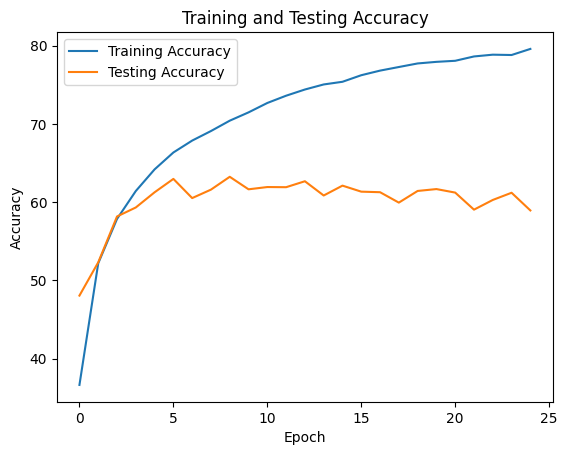

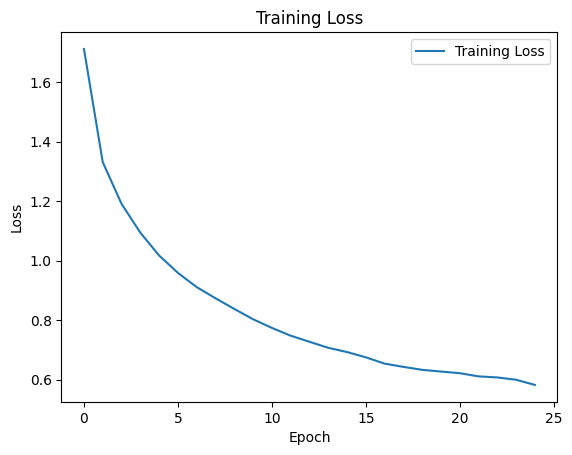

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

## Q5.1

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


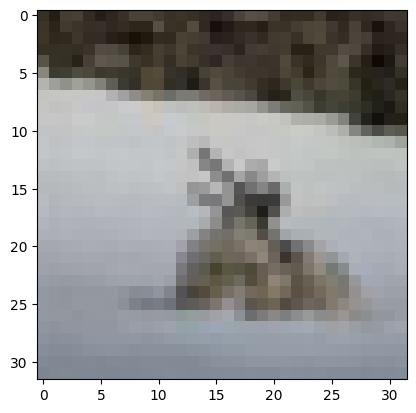

deer 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.668 | Accuracy: 39.232
Test Accuracy: 46.850
Epoch:  2
Train Loss: 1.466 | Accuracy: 47.768
Test Accuracy: 50.010
Epoch:  3
Train Loss: 1.436 | Accuracy: 49.704
Test Accuracy: 48.490
Epoch:  4
Train Loss: 1.429 | Accuracy: 50.492
Test Accuracy: 46.630
Epoch:  5
Train Loss: 1.429 | Accuracy: 50.910
Test Accuracy: 45.910
Epoch:  6
Train Loss: 1.421 | Accuracy: 51.452
Test Accuracy: 47.030
Epoch:  7
Train Loss: 1.455 | Accuracy: 50.500
Test Accuracy: 49.600
Epoch:  8
Train Loss: 1.452 | Accuracy: 51.124
Test Accuracy: 48.670
Epoch:  9
Train Loss: 1.476 | Accuracy: 50.316
Test Accuracy: 46.970
Epoch:  10
Train Loss: 1.474 | Accuracy: 50.848
Test Accuracy: 48.670
Epoch:  11
Train Loss: 1.494 | Accuracy: 50.122
Test Accuracy: 47.680
Epoch:  12
Train Loss: 1.515 | Accuracy: 49.336
Test Accuracy: 48.720
Epoch:  13
Train Loss: 1.513 | Accuracy: 49.822
Test Accuracy: 47.660
Epoch:  14
Train Loss: 1.524 | Accuracy: 49.358
Test Accuracy: 45.810
Epoch:  15
Train Loss: 1.561 

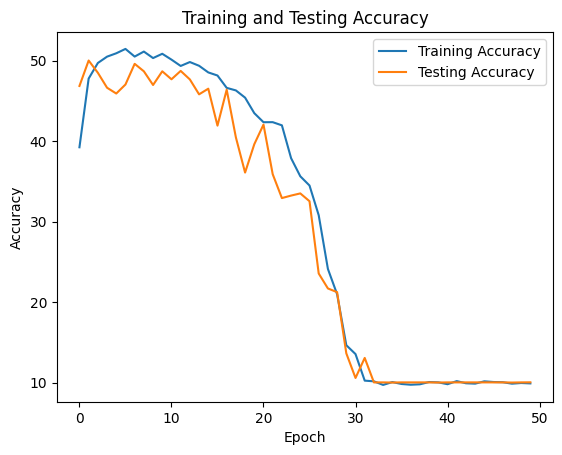

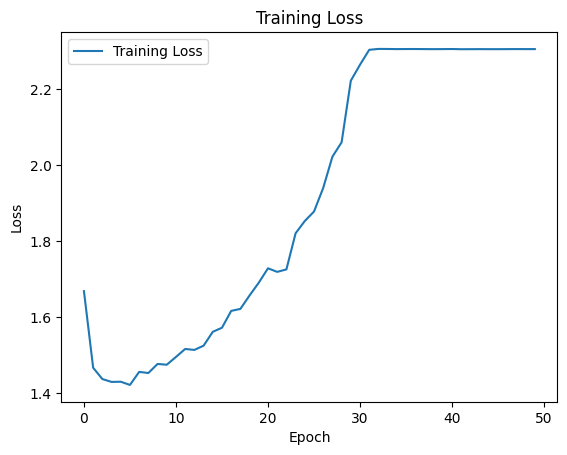

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

## Q5.2

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


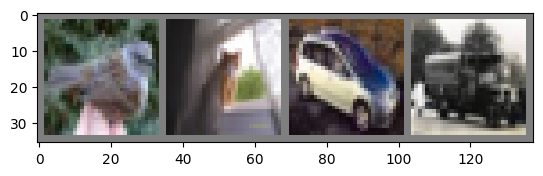

bird  cat   car   truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.713 | Accuracy: 37.072
Test Accuracy: 49.580
Epoch:  2
Train Loss: 1.336 | Accuracy: 51.818
Test Accuracy: 54.080
Epoch:  3
Train Loss: 1.206 | Accuracy: 56.988
Test Accuracy: 58.150
Epoch:  4
Train Loss: 1.118 | Accuracy: 60.316
Test Accuracy: 58.060
Epoch:  5
Train Loss: 1.046 | Accuracy: 63.106
Test Accuracy: 61.030
Epoch:  6
Train Loss: 0.992 | Accuracy: 64.914
Test Accuracy: 61.190
Epoch:  7
Train Loss: 0.943 | Accuracy: 66.904
Test Accuracy: 61.980
Epoch:  8
Train Loss: 0.904 | Accuracy: 67.900
Test Accuracy: 61.190
Epoch:  9
Train Loss: 0.866 | Accuracy: 69.258
Test Accuracy: 62.250
Epoch:  10
Train Loss: 0.834 | Accuracy: 70.360
Test Accuracy: 62.130
Epoch:  11
Train Loss: 0.798 | Accuracy: 71.678
Test Accuracy: 61.300
Epoch:  12
Train Loss: 0.778 | Accuracy: 72.588
Test Accuracy: 61.450
Epoch:  13
Train Loss: 0.752 | Accuracy: 73.302
Test Accuracy: 61.650
Epoch:  14
Train Loss: 0.731 | Accuracy: 73.846
Test Accuracy: 60.100
Epoch:  15
Train Loss: 0.711 

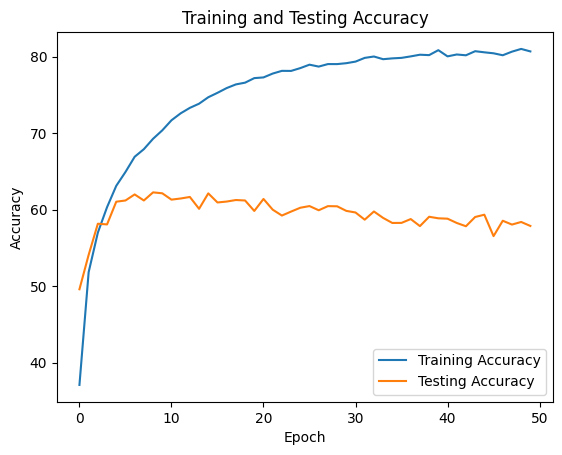

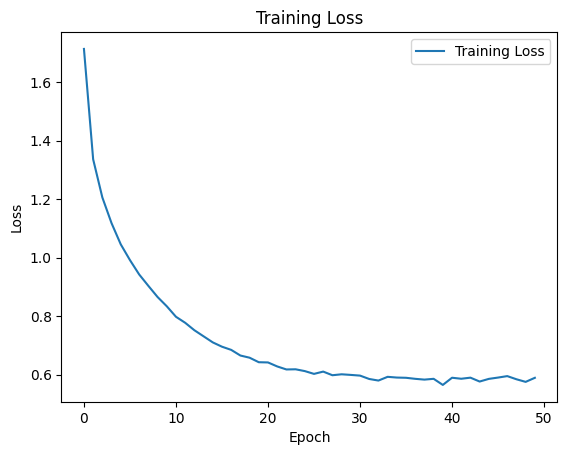

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

##Q5.3

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 12292272.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


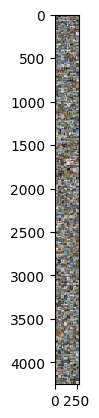

bird  car   cat   truck deer  dog   ship  bird  bird  plane cat   truck plane ship  frog  bird  truck truck truck plane horse dog   car   deer  deer  ship  horse dog   horse truck car   horse dog   truck deer  ship  car   truck cat   dog   horse dog   frog  bird  horse ship  car   car   truck frog  ship  dog   deer  deer  car   bird  frog  plane ship  truck plane deer  bird  car   ship  horse cat   dog   horse ship  dog   deer  car   deer  dog   frog  car   deer  horse truck dog   ship  frog  horse cat   car   bird  plane plane car   car   ship  deer  cat   dog   bird  ship  horse truck dog   plane cat   horse horse truck plane truck plane car   truck truck truck horse deer  plane bird  deer  frog  dog   cat   bird  cat   ship  car   cat   ship  cat   frog  cat   plane car   plane plane bird  cat   car   truck plane plane horse plane car   frog  bird  car   cat   horse dog   horse deer  ship  car   bird  frog  frog  frog  bird  horse cat   truck dog   truck bird  plane dog   plane ship

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(25):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 2.297 | Accuracy: 12.300
Test Accuracy: 13.350
Epoch:  2
Train Loss: 2.296 | Accuracy: 14.112
Test Accuracy: 15.080
Epoch:  3
Train Loss: 2.294 | Accuracy: 15.876
Test Accuracy: 16.530
Epoch:  4
Train Loss: 2.292 | Accuracy: 17.056
Test Accuracy: 17.410
Epoch:  5
Train Loss: 2.290 | Accuracy: 17.450
Test Accuracy: 17.670
Epoch:  6
Train Loss: 2.287 | Accuracy: 17.486
Test Accuracy: 17.600
Epoch:  7
Train Loss: 2.282 | Accuracy: 17.374
Test Accuracy: 17.460
Epoch:  8
Train Loss: 2.276 | Accuracy: 17.184
Test Accuracy: 17.330
Epoch:  9
Train Loss: 2.267 | Accuracy: 17.152
Test Accuracy: 17.300
Epoch:  10
Train Loss: 2.254 | Accuracy: 17.418
Test Accuracy: 17.630
Epoch:  11
Train Loss: 2.236 | Accuracy: 17.948
Test Accuracy: 18.350
Epoch:  12
Train Loss: 2.212 | Accuracy: 18.610
Test Accuracy: 19.270
Epoch:  13
Train Loss: 2.183 | Accuracy: 19.338
Test Accuracy: 19.860
Epoch:  14
Train Loss: 2.157 | Accuracy: 20.210
Test Accuracy: 21.170
Epoch:  15
Train Loss: 2.136 

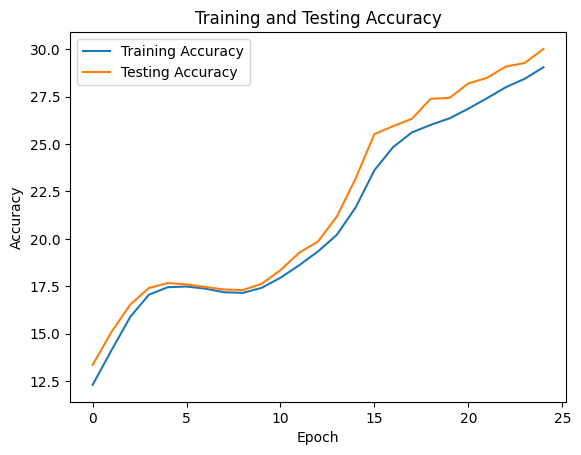

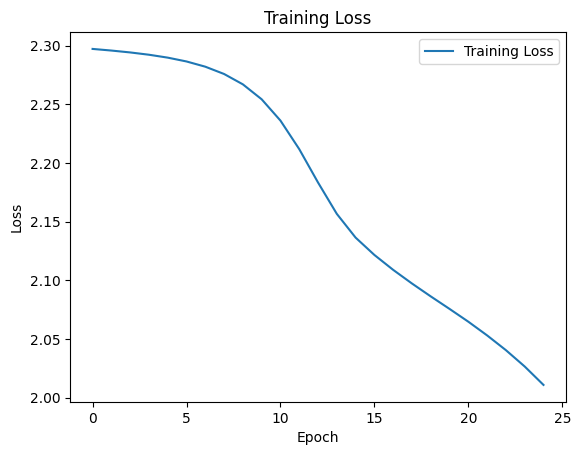

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

The batch size is the number of samples that are passed to the network at once. For example, with a batch size of 1000, we run all 1000 images through the model, average their results, and then do back-propagation. Same goes with batch size 4 only that we run 4 images at once. With a batch size of 1, we run each image individually through the model, average the one result and then do a back propagation. With the observations from above, training/testing with natch size of 1 takes way more time than training/testing with batch size of 4 or 1000. Increasing batch sizes reduces performance. (1000 < 4 < 1). 

## Q6.1

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


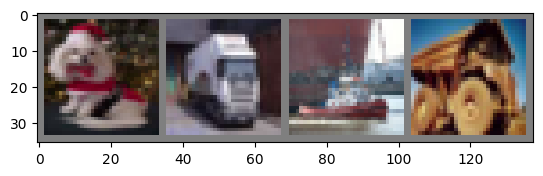

dog   truck ship  truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: nan | Accuracy: 10.002
Test Accuracy: 10.000
Epoch:  2
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  3
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  4
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  5
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  6
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  7
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  8
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  9
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  10
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  11
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  12
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  13
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  14
Train Loss: nan | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  15
Train Loss: nan | Accuracy: 10.000
Test Accura

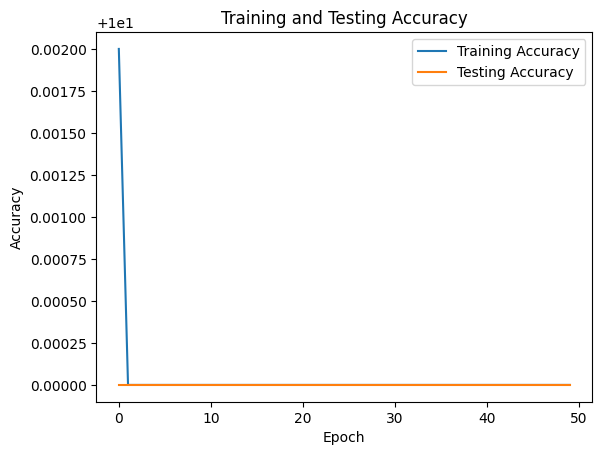

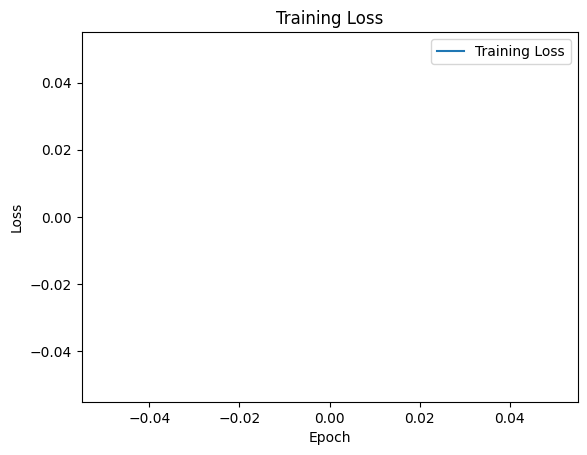

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

## Q6.2

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


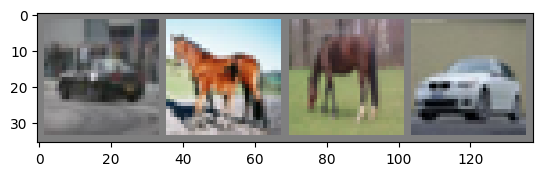

car   horse horse car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 2.362 | Accuracy: 10.062
Test Accuracy: 10.000
Epoch:  2
Train Loss: 2.360 | Accuracy: 9.972
Test Accuracy: 10.000
Epoch:  3
Train Loss: 2.359 | Accuracy: 9.960
Test Accuracy: 10.000
Epoch:  4
Train Loss: 2.361 | Accuracy: 10.072
Test Accuracy: 10.000
Epoch:  5
Train Loss: 2.361 | Accuracy: 9.756
Test Accuracy: 10.000
Epoch:  6
Train Loss: 2.359 | Accuracy: 10.130
Test Accuracy: 10.000
Epoch:  7
Train Loss: 2.359 | Accuracy: 10.064
Test Accuracy: 10.000
Epoch:  8
Train Loss: 2.361 | Accuracy: 9.930
Test Accuracy: 10.000
Epoch:  9
Train Loss: 2.360 | Accuracy: 9.934
Test Accuracy: 10.000
Epoch:  10
Train Loss: 2.361 | Accuracy: 9.826
Test Accuracy: 10.000
Epoch:  11
Train Loss: 2.361 | Accuracy: 10.020
Test Accuracy: 10.000
Epoch:  12
Train Loss: 2.360 | Accuracy: 9.748
Test Accuracy: 10.000
Epoch:  13
Train Loss: 2.359 | Accuracy: 9.878
Test Accuracy: 10.000
Epoch:  14
Train Loss: 2.360 | Accuracy: 9.934
Test Accuracy: 10.000
Epoch:  15
Train Loss: 2.360 | Accurac

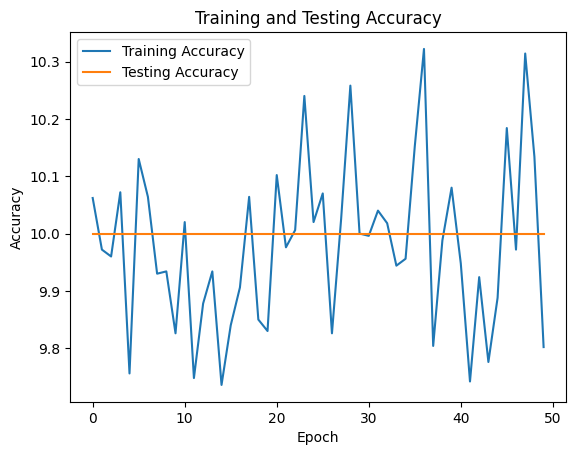

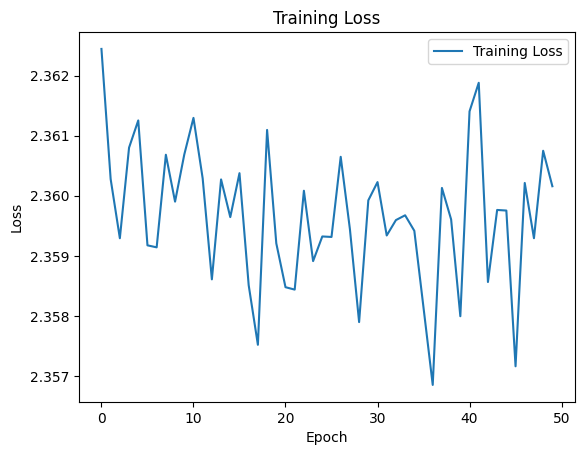

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

## Q6.3

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


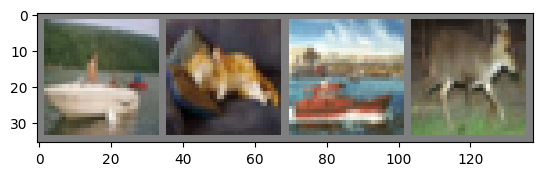

ship  cat   ship  deer 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.980 | Accuracy: 25.382
Test Accuracy: 25.780
Epoch:  2
Train Loss: 1.981 | Accuracy: 26.454
Test Accuracy: 24.110
Epoch:  3
Train Loss: 2.038 | Accuracy: 23.354
Test Accuracy: 11.010
Epoch:  4
Train Loss: 2.270 | Accuracy: 12.406
Test Accuracy: 19.080
Epoch:  5
Train Loss: 2.107 | Accuracy: 20.256
Test Accuracy: 22.510
Epoch:  6
Train Loss: 2.086 | Accuracy: 21.428
Test Accuracy: 24.320
Epoch:  7
Train Loss: 2.074 | Accuracy: 22.566
Test Accuracy: 25.010
Epoch:  8
Train Loss: 2.056 | Accuracy: 23.324
Test Accuracy: 22.700
Epoch:  9
Train Loss: 2.229 | Accuracy: 14.076
Test Accuracy: 10.000
Epoch:  10
Train Loss: 2.308 | Accuracy: 10.114
Test Accuracy: 10.000
Epoch:  11
Train Loss: 2.308 | Accuracy: 9.938
Test Accuracy: 10.000
Epoch:  12
Train Loss: 2.308 | Accuracy: 9.970
Test Accuracy: 10.000
Epoch:  13
Train Loss: 2.308 | Accuracy: 9.896
Test Accuracy: 10.000
Epoch:  14
Train Loss: 2.309 | Accuracy: 9.886
Test Accuracy: 10.000
Epoch:  15
Train Loss: 2.308 | Ac

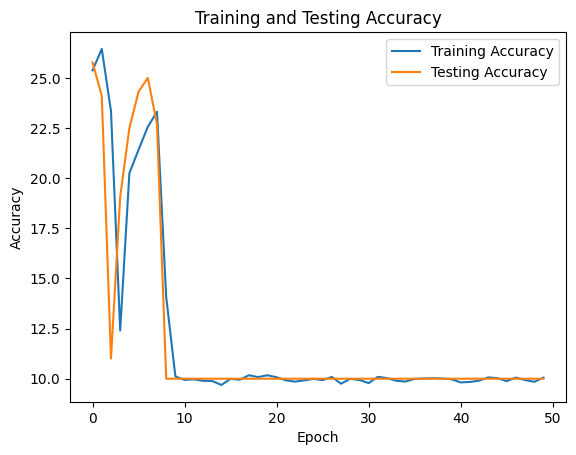

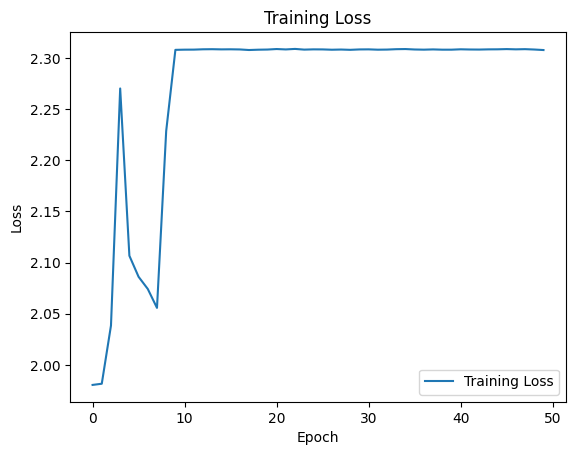

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

## Q6.4

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


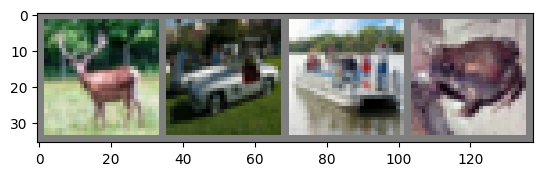

deer  car   ship  frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 2.249 | Accuracy: 17.688
Test Accuracy: 26.310
Epoch:  2
Train Loss: 1.872 | Accuracy: 31.702
Test Accuracy: 36.550
Epoch:  3
Train Loss: 1.661 | Accuracy: 39.164
Test Accuracy: 41.650
Epoch:  4
Train Loss: 1.536 | Accuracy: 44.360
Test Accuracy: 45.870
Epoch:  5
Train Loss: 1.447 | Accuracy: 47.820
Test Accuracy: 50.020
Epoch:  6
Train Loss: 1.375 | Accuracy: 50.434
Test Accuracy: 51.410
Epoch:  7
Train Loss: 1.312 | Accuracy: 52.696
Test Accuracy: 54.000
Epoch:  8
Train Loss: 1.257 | Accuracy: 54.972
Test Accuracy: 55.070
Epoch:  9
Train Loss: 1.210 | Accuracy: 57.080
Test Accuracy: 56.640
Epoch:  10
Train Loss: 1.168 | Accuracy: 58.482
Test Accuracy: 57.230
Epoch:  11
Train Loss: 1.131 | Accuracy: 59.754
Test Accuracy: 58.390
Epoch:  12
Train Loss: 1.097 | Accuracy: 61.278
Test Accuracy: 58.940
Epoch:  13
Train Loss: 1.067 | Accuracy: 62.362
Test Accuracy: 59.670
Epoch:  14
Train Loss: 1.036 | Accuracy: 63.498
Test Accuracy: 60.230
Epoch:  15
Train Loss: 1.012 

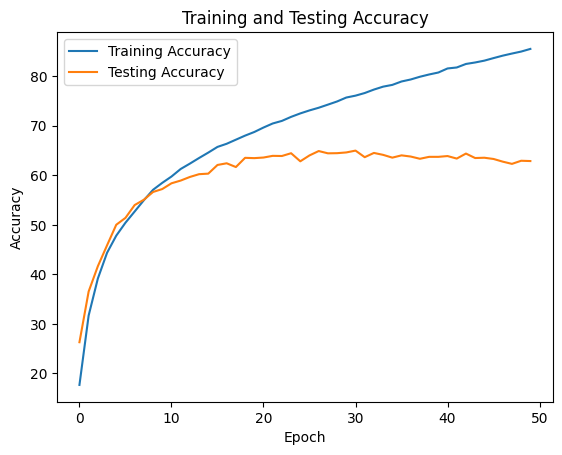

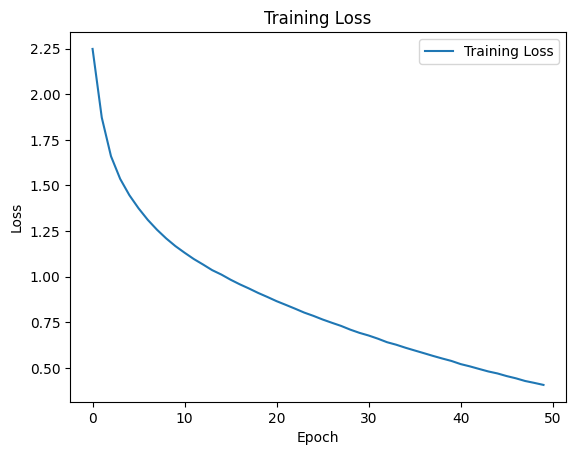

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

For large learning rate like 10, we get our training loss to be nan which signifies instability. So large learning rates signifies instabilty. The lower the value, the slower we travel along the downward slope. With a lr=10, the model converges fastest and with a lr=0.01 the model converges the slowest.

## Q7

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform_train = transforms.Compose([
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])
transform_test =  transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


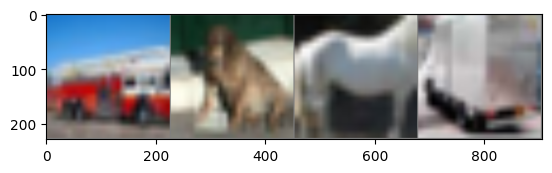

truck dog   horse truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train_losses=[]
# train_accu=[]
def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          # _, predicted = torch.max(outputs.data, 1)
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  epoch_test_acc = 100 * correct / total
  test_acc.append(epoch_test_acc)
  print('Test Accuracy: %.3f'%(epoch_test_acc))

In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(50):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  2
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  3
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  4
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  5
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  6
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  7
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  8
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  9
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  10
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  11
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  12
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  13
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  14
Train Loss: 2.305 | Accuracy: 10.000
Test Accuracy: 10.000
Epoch:  15
Train Loss: 2.305 

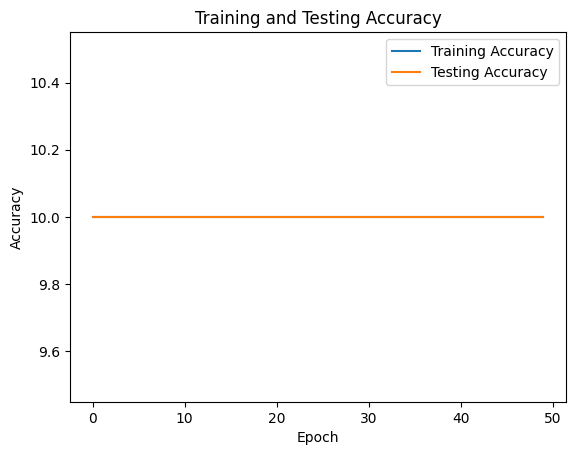

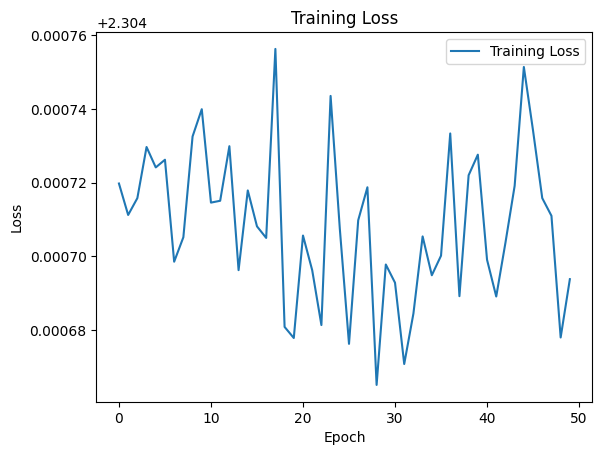

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

## Q8

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 81963897.18it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


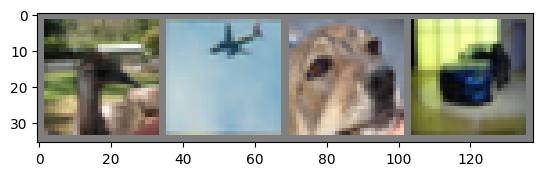

bird  plane dog   car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:

def train():
  running_loss = 0.0
  correct = 0.0
  total = 0.0
  for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
  train_loss=running_loss/len(trainloader)
  accu=100.*correct/total

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
def data_augmentation(images):
  transform = transforms.Compose([  
      transforms.ToPILImage(),
      transforms.RandomCrop(32, padding=4),
      transforms.RandomHorizontalFlip(),
      transforms.RandomVerticalFlip(),
      transforms.RandomRotation(10),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
  ])
  new_image = torch.stack([transform(image) for image in images])
  return new_image

In [ ]:
from PIL import Image
import numpy as np

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = []
            for i in range(10):
              new_image = data_augmentation(images)
              outputs.append(net(new_image))
            outputs_avg = torch.mean(torch.stack(outputs), dim=0)
            _, predicted = outputs_avg.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_test_acc = 100 * correct / total
    test_acc.append(epoch_test_acc)
    print('Test Accuracy: %.3f' % epoch_test_acc)


In [ ]:
train_losses=[]
train_accu=[]
test_acc=[]
for epoch in range(25):
  print("Epoch: ", epoch+1)
  train()
  test()

Epoch:  1
Train Loss: 1.706 | Accuracy: 36.920
Test Accuracy: 20.080
Epoch:  2
Train Loss: 1.337 | Accuracy: 51.964
Test Accuracy: 19.360
Epoch:  3
Train Loss: 1.188 | Accuracy: 57.724
Test Accuracy: 20.170
Epoch:  4
Train Loss: 1.087 | Accuracy: 61.420
Test Accuracy: 20.190
Epoch:  5
Train Loss: 1.011 | Accuracy: 64.178
Test Accuracy: 21.550
Epoch:  6
Train Loss: 0.951 | Accuracy: 66.224
Test Accuracy: 23.120
Epoch:  7
Train Loss: 0.904 | Accuracy: 68.102
Test Accuracy: 26.830
Epoch:  8
Train Loss: 0.855 | Accuracy: 69.846
Test Accuracy: 23.610
Epoch:  9
Train Loss: 0.820 | Accuracy: 70.714
Test Accuracy: 21.350
Epoch:  10
Train Loss: 0.788 | Accuracy: 71.946
Test Accuracy: 23.510
Epoch:  11
Train Loss: 0.759 | Accuracy: 72.908
Test Accuracy: 20.460
Epoch:  12
Train Loss: 0.730 | Accuracy: 74.134
Test Accuracy: 24.800
Epoch:  13
Train Loss: 0.708 | Accuracy: 74.906
Test Accuracy: 23.650
Epoch:  14
Train Loss: 0.692 | Accuracy: 75.384
Test Accuracy: 20.810
Epoch:  15
Train Loss: 0.672 

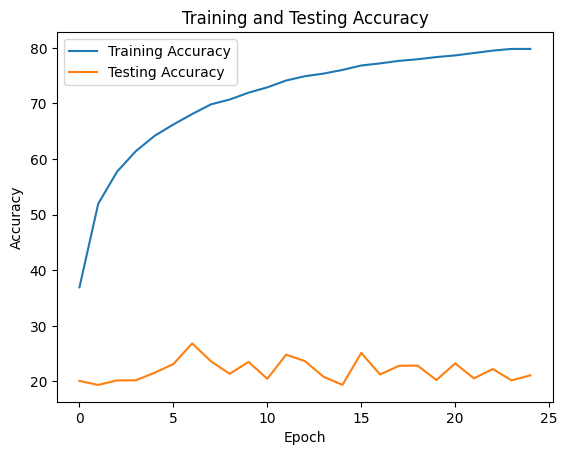

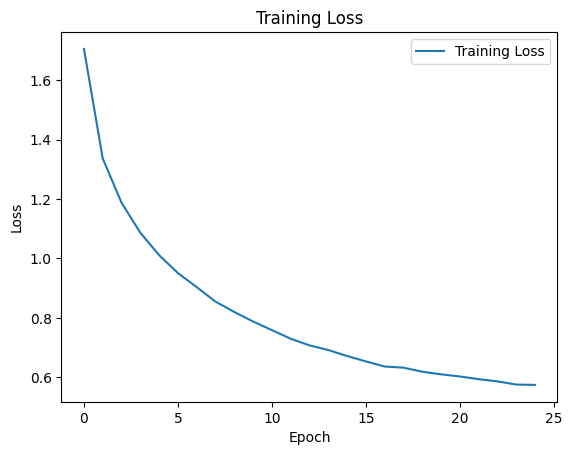

In [ ]:
plt.figure()
plt.plot(train_accu, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

print('\n')

plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()